<a href="https://colab.research.google.com/github/MariliaBagnato/LSGproject/blob/main/LSG_Categories_by_date_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import pandas as pd

auth.authenticate_user()

query = '''
SELECT *
FROM `lsg-389008.item_sales.sales_global`
ORDER BY rand()
'''
sales_df = pd.read_gbq(query, project_id="lsg-389008")
sales_df.head()

,Date,Time,Category_1,Category_2,Item_Name,Qty,SKU,Product_Sales,Discounts,Net_Sales,Tax,Gross_Sales,Transaction_ID,Customer_ID,Event_Type,Count,Unit,GTIN
0,2021-12-24,10:54:26,Bread,Bread,Country Loaf - Bread 41,1.0,BRD-167,5.50,0.0,5.50,0.00,5.50,yYLX1uqFuONKzQfDTb6Hq0seV,None,Payment,1,ea,<NA>
1,2022-09-03,16:57:56,Grocery,Fresh,Sicilian Hummus Lilliput,1.0,FRS-155,4.95,0.0,4.95,0.00,4.95,Wik9NOqZORgLjA1sVwhubqueV,None,Payment,1,ea,<NA>
2,2022-09-10,08:24:11,Pastries,Pastries,Custardo Portuguese Tart,2.0,PAS-175,6.00,0.0,6.00,0.00,6.00,2cv6SijDuWmIxOZkN3RQOmoeV,1Z1QP7X3AX1EXBTVJB7TCAFHF8,Payment,2,ea,<NA>
3,2023-05-28,11:26:35,Grocery,Fresh,Plain Hummus Lilliput,1.0,FRS-154,4.95,0.0,4.95,0.00,4.95,sh482AkB4wDZlkY9YEjqCoieV,None,Payment,1,ea,2100000000142
4,2022-02-08,12:45:25,Cafe,Café,Americano,1.0,6768455,2.64,0.0,2.64,0.36,3.00,ANevMji6eky70mN1MVCEFQteV,None,Payment,1,ea,<NA>


**Extracting 'Weekday' and 'Hour' from 'Time'**

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

sales_df['Weekday'] = sales_df['Date'].dt.weekday

# Extract the hour component from the 'Time' column as an integer
sales_df['Hour'] = sales_df['Time'].apply(lambda x: x.hour)

grouped_data = sales_df.groupby(['Category_1', sales_df['Date'].dt.date, 'Weekday', 'Hour'])

# Calculate the count of sales in each group
sales_count = grouped_data.size().reset_index(name='Sales_Count')

In [ ]:

sales_count.head()

,Category_1,Date,Weekday,Hour,Sales_Count
0,Bread,2021-08-03,1,10,2
1,Bread,2021-08-03,1,11,1
2,Bread,2021-08-03,1,12,5
3,Bread,2021-08-03,1,13,3
4,Bread,2021-08-04,2,10,1


In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Extract the weekday and hour components
sales_df['Weekday'] = sales_df['Date'].dt.weekday
sales_df['Hour'] = sales_df['Time'].apply(lambda x: x.hour)

# Group by category, weekday, and hour, and calculate the average sales count
average_sales = sales_df.groupby(['Category_1', 'Weekday', 'Hour']).size().reset_index(name='Sales_Count')
average_sales['Average_Sales'] = average_sales['Sales_Count']


In [ ]:
filtered_data = sales_count[(sales_count['Weekday'] == 0) & (sales_count['Hour'] == 12) & (sales_count['Category_1'] == 'Bread')]

# Calculate the count of rows that satisfy the conditions
count = filtered_data.shape[0]

# Print the result
print("Count of rows: ", count)

Count of rows:  16


In [ ]:
grouped_data = sales_count.groupby(['Category_1','Weekday', 'Hour']).size().reset_index(name='Category_Weekday_Hour_Count')
merged_data = pd.merge(sales_count, grouped_data, on=['Weekday', 'Hour'])
merged_data

,Category_1_x,Date,Weekday,Hour,Sales_Count,Category_1_y,Category_Weekday_Hour_Count
0,Bread,2021-08-03,1,10,2,Bread,67
1,Bread,2021-08-03,1,10,2,Cafe,94
2,Bread,2021-08-03,1,10,2,Drinks_in_store,1
3,Bread,2021-08-03,1,10,2,Events,1
4,Bread,2021-08-03,1,10,2,Grocery,106
...,...,...,...,...,...,...,...
315544,Wine,2021-07-09,4,22,4,Wine,2
315545,Wine,2021-04-28,2,0,1,Wine,1
315546,Wine,2022-06-27,0,0,5,Wine,1
315547,Wine,2023-02-09,3,21,1,Wine,1


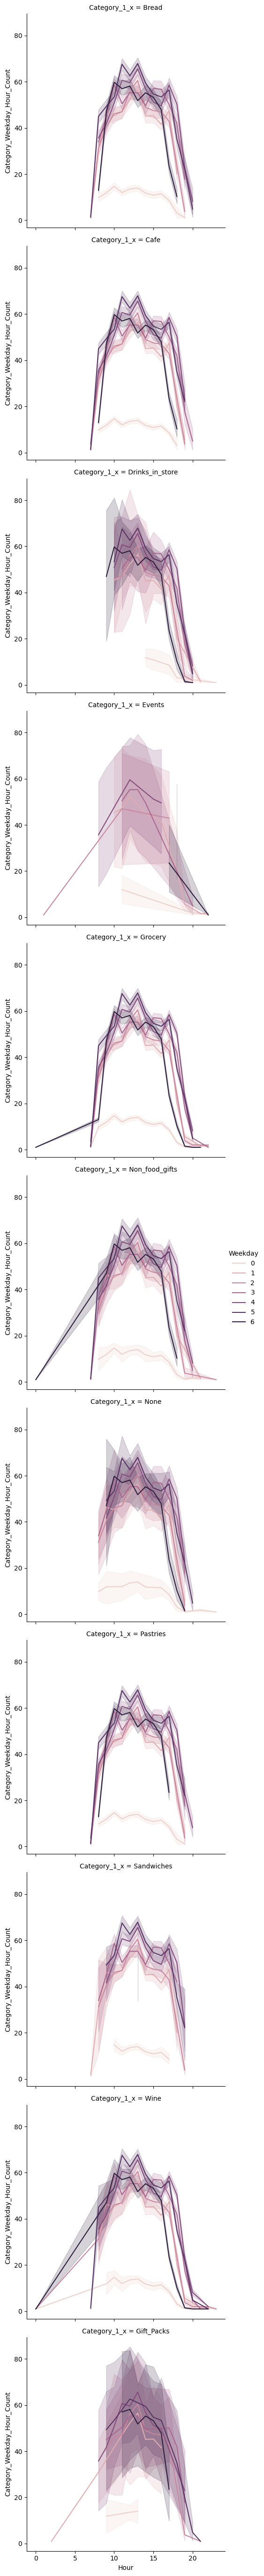

In [ ]:
import seaborn as sns

sns.relplot(data=merged_data, x='Hour', y='Category_Weekday_Hour_Count', hue='Weekday',
             row="Category_1_x", kind="line")

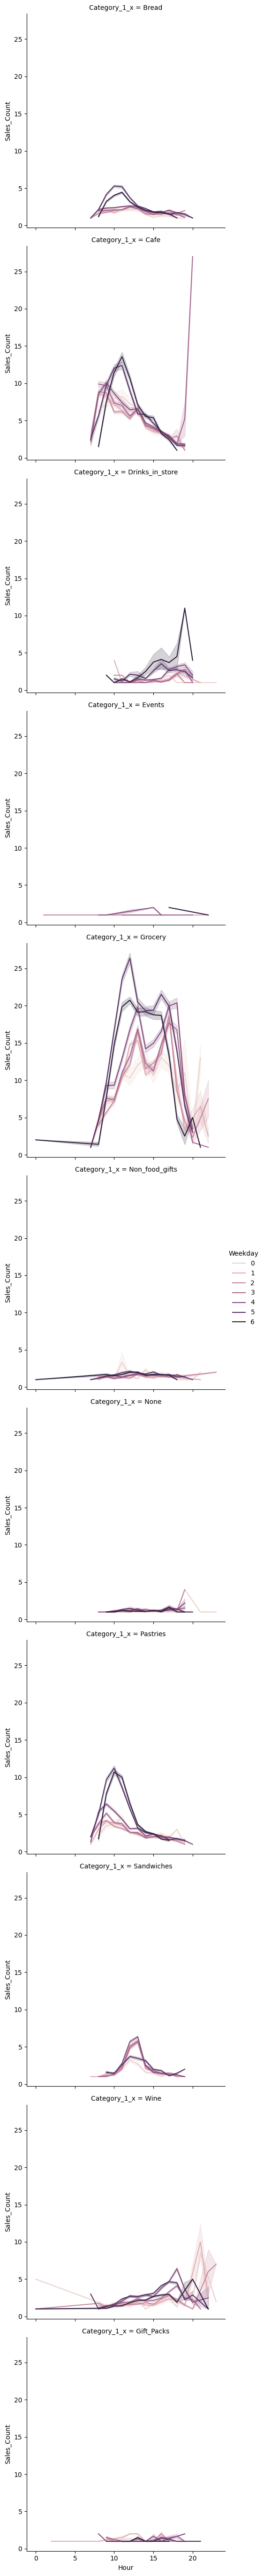

In [ ]:
sns.relplot(data=merged_data, x='Hour', y='Sales_Count', hue='Weekday',
             row="Category_1_x", kind="line")

Best sales hours/ weekdays by Category_1:

Grocery: main peak: Sat > from 10am to 12pm // 3pm to 5pm
        secondary: Sun > 10am to 4pm
                  Wed, Thu, Fri > 12pm

Wine: main peak: Fri > 6pm
      secundary: Thu, Sat > from 4pm to 6pm

Cafe and Pastrie: main peak: Sat, Sun > from 9am to 12pm
                secondary: Wed, Thu, Fri > from 8am to 10am


Bread: Sat, Sun > from 9am to 12pm

Drinks in Store: main peak: Sat, Sun > from 3pm to 8pm
                secondary: Fri > from 5pm to 8pm

Sandwiches: Wed, Thu, Fri > from 11am to 2pm
